In [1]:
import os 
#os.chdir("/home/psenin/git/saxpy")
os.chdir('C:/Users/ng6e164/PycharmProjects/saxpy')
os.getcwd()

'C:\\Users\\ng6e164\\PycharmProjects\\saxpy'

In [2]:
import numpy as np
from saxpy.sax import sax_via_window
from saxpy.saxvsm import series_to_wordbag
from saxpy.saxvsm import manyseries_to_wordbag
from saxpy.saxvsm import bags_to_tfidf
from saxpy.saxvsm import cosine_similarity
from saxpy.saxvsm import class_for_bag


In [3]:
bag1 = { "this": 10, "is": 1, "a": 2, "sample": 1}
bag2 = { "this": 10, "is": 1, "another": 2, "example": 3}
bags = {"bag1":bag1, "bag2":bag2}
str(bags)

"{'bag1': {'this': 10, 'is': 1, 'a': 2, 'sample': 1}, 'bag2': {'this': 10, 'is': 1, 'another': 2, 'example': 3}}"

In [4]:
[*bags.copy()]

['bag1', 'bag2']

In [5]:
res = bags_to_tfidf(bags)
res

{'classes': ['bag1', 'bag2'],
 'vectors': {'a': [0.76150001041880899, 0.0],
  'another': [0.0, 0.76150001041880899],
  'example': [0.0, 0.96090602783640278],
  'sample': [0.48045301391820139, 0.0]}}

In [6]:
res["vectors"]

{'a': [0.76150001041880899, 0.0],
 'another': [0.0, 0.76150001041880899],
 'example': [0.0, 0.96090602783640278],
 'sample': [0.48045301391820139, 0.0]}

In [7]:
from saxpy.util import read_ucr_data
dd = read_ucr_data('resources/data/cbf/CBF_TRAIN')

In [8]:
win = 30
paa = 6
alp = 6
na_strategy = "exact"
ztresh = 0.01

bags = {}

for key, arr in dd.items():
    print(key)
    bags[key] = manyseries_to_wordbag(dd[key], win, paa, alp, na_strategy, ztresh)


1
3
2


In [9]:
[*bags.copy()]

['1', '3', '2']

In [10]:
vectors = bags_to_tfidf(bags)
vectors['classes']

['1', '3', '2']

In [11]:
dt = read_ucr_data('resources/data/cbf/CBF_TEST')

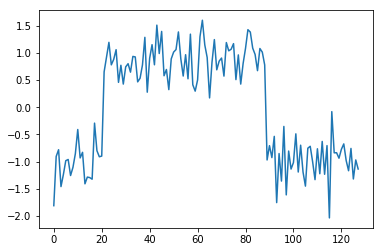

In [12]:
import matplotlib.pyplot as plt
import datetime
import numpy as np

series = dt['1'][6]
x = np.arange(0, len(series))
y = np.asarray(series)

plt.plot(x,y)
plt.show()

In [13]:
test_bag = series_to_wordbag(series, 30, 6, 6, "exact", 0.01)
#test_bag

In [14]:
res = cosine_similarity(vectors, test_bag)
res

{'1': 0.8096998752732335, '2': 0.91433733786773486, '3': 0.95867368251031904}

In [15]:
class_for_bag(res)

'1'

In [16]:
for cls in [*dt.copy()]:
    print(cls)
    i = 0
    for s in dt[cls]:
        sim = cosine_similarity(vectors, 
                                series_to_wordbag(s, 30, 6, 6, "none", 0.01))
        res = class_for_bag(sim)
        if res != cls:
            print(" misclassified", i, "as", res, sim)
        i = i + 1
        

2
1
 misclassified 72 as 2 {'1': 0.92853215910979048, '3': 0.94644982977028103, '2': 0.90361918327181945}
 misclassified 91 as 2 {'1': 0.89773989722580827, '3': 0.95640189691324418, '2': 0.89753754493831839}
 misclassified 256 as 2 {'1': 0.93156990542330831, '3': 0.94594144806166813, '2': 0.90273991600777048}
3
 misclassified 223 as 1 {'1': 0.86883795152559462, '3': 0.89417006609748306, '2': 0.98599573407109053}


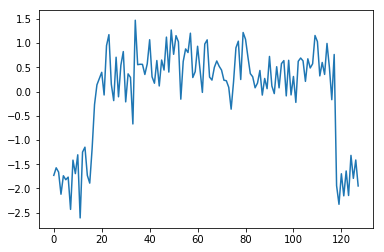

In [17]:
series = dt['1'][72]
x = np.arange(0, len(series))
y = np.asarray(series)
plt.plot(x,y)
plt.show()

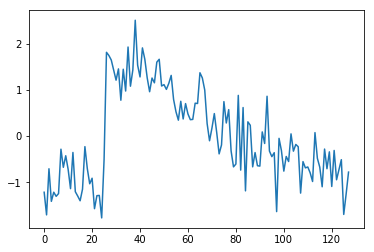

In [18]:
series = dt['3'][223]
x = np.arange(0, len(series))
y = np.asarray(series)
plt.plot(x,y)
plt.show()

In [20]:
train = read_ucr_data('resources/data/cbf/CBF_TRAIN')
test = read_ucr_data('resources/data/cbf/CBF_TEST')

win = 30
paa = 6
alp = 6
na_strategy = "exact"
zthresh = 0.01

def test_accuracy(dd_train, dd_test, sax_win, sax_paa, sax_alp, sax_strategy, z_threshold):
    
    train_bags = {}
    for key, arr in dd_train.items():
        train_bags[key] = manyseries_to_wordbag(dd[key], sax_win, sax_paa,
                                                sax_alp, sax_strategy, z_threshold)
    
    tfidf_vectors = bags_to_tfidf(train_bags)

    correct = 0
    count = 0

    for cls in [*dd_test.copy()]:
        for s in dd_test[cls]:
            sim = cosine_similarity(tfidf_vectors, 
                                    series_to_wordbag(s, sax_win, sax_paa,
                                                      sax_alp, sax_strategy, z_threshold))
            res = class_for_bag(sim)
            if res == cls:
                correct = correct + 1
            count = count + 1
    
    return correct / count

In [21]:
test_accuracy(train, test, win, paa, alp, na_strategy, zthresh)

0.9944444444444445